<a href="https://colab.research.google.com/github/intelligentagents/aprendizagem-supervisionada/blob/master/notebooks/1_preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Semana 1 - Aprendizagem Supervisonada
---



## Pré-Processamento dos Dados.

### Importando as bibliotecas

In [0]:
import pandas as pd
import random
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold


### Importando e explorando o dataset

In [0]:
data_url = 'https://raw.githubusercontent.com/r4phael/ml-course/master/data/preprocessing_data.csv'

df = pd.read_csv(data_url)

df.head(10)

,City,Age,Salary,Sex,Acquired
0,Paraiba,42.0,6500.0,M,No
1,Sao Paulo,21.0,4300.0,F,Yes
2,Brasilia,28.0,4900.0,F,No
3,Recife,35.0,5400.0,F,No
4,Maceio,38.0,NaN,M,Yes
5,Sao Paulo,33.0,5200.0,M,Yes
6,Belo Horizonte,NaN,4700.0,F,No
7,Sao Paulo,45.0,7100.0,M,Yes
8,Paraiba,51.0,7500.0,F,No
9,Fortaleza,39.0,6000.0,M,Yes


Descrevendo o dataset

In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 5 columns):
City        10 non-null object
Age         9 non-null float64
Salary      9 non-null float64
Sex         10 non-null object
Acquired    10 non-null object
dtypes: float64(2), object(3)
memory usage: 528.0+ bytes


Exibindo o sumário dos valores númericos do dataset:

In [0]:
df.describe()

,Age,Salary
count,9.000000,9.000000
mean,36.888889,5733.333333
std,8.992281,1110.180166
min,21.000000,4300.000000
25%,33.000000,4900.000000
50%,38.000000,5400.000000
75%,42.000000,6500.000000
max,51.000000,7500.000000


Analisando a Distribuição das váriaveis numéricas em um bloxplot:


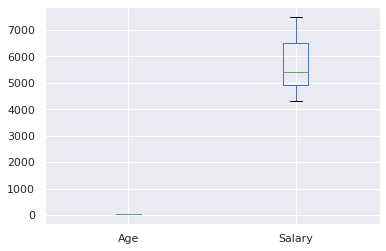

In [0]:
df.boxplot()

Analisando a Distribuição das váriaveis numéricas em um gráfico de barras:


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f5264a0d1d0>,
      dtype=object)

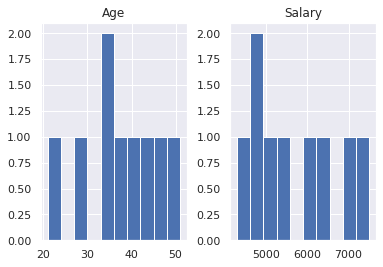

In [0]:
df.hist()

### Manipulação e tratamento dos dados.

Detectando registros com valores nulos no dataframe:

In [0]:
df[df.isnull().any(axis=1)]

,City,Age,Salary,Sex,Acquired
4,Maceio,38.0,NaN,M,Yes
6,Belo Horizonte,NaN,4700.0,F,No


Deletando registros com valores nulos:

In [0]:
df.dropna()

,City,Age,Salary,Sex,Acquired
0,Paraiba,42.0,6500.0,M,No
1,Sao Paulo,21.0,4300.0,F,Yes
2,Brasilia,28.0,4900.0,F,No
3,Recife,35.0,5400.0,F,No
5,Sao Paulo,33.0,5200.0,M,Yes
7,Sao Paulo,45.0,7100.0,M,Yes
8,Paraiba,51.0,7500.0,F,No
9,Fortaleza,39.0,6000.0,M,Yes


Preenchendo os registros nuḿericos que não possuem valores com zeros:

In [0]:
df.fillna(0)

,City,Age,Salary,Sex,Acquired
0,Paraiba,42.0,6500.0,M,No
1,Sao Paulo,21.0,4300.0,F,Yes
2,Brasilia,28.0,4900.0,F,No
3,Recife,35.0,5400.0,F,No
4,Maceio,38.0,0.0,M,Yes
5,Sao Paulo,33.0,5200.0,M,Yes
6,Belo Horizonte,0.0,4700.0,F,No
7,Sao Paulo,45.0,7100.0,M,Yes
8,Paraiba,51.0,7500.0,F,No
9,Fortaleza,39.0,6000.0,M,Yes


Preenchendo os registros nuḿericos que não possuem valores com a média.

In [0]:
df.fillna(df.mean())

,City,Age,Salary,Sex,Acquired
0,Paraiba,42.000000,6500.000000,M,No
1,Sao Paulo,21.000000,4300.000000,F,Yes
2,Brasilia,28.000000,4900.000000,F,No
3,Recife,35.000000,5400.000000,F,No
4,Maceio,38.000000,5733.333333,M,Yes
5,Sao Paulo,33.000000,5200.000000,M,Yes
6,Belo Horizonte,36.888889,4700.000000,F,No
7,Sao Paulo,45.000000,7100.000000,M,Yes
8,Paraiba,51.000000,7500.000000,F,No
9,Fortaleza,39.000000,6000.000000,M,Yes


Salvando o dataframe com os registros nuḿericos que não possuem valores com a mediana.

In [0]:
df = df.fillna(df.median())
df

,City,Age,Salary,Sex,Acquired
0,Paraiba,42.0,6500.0,M,No
1,Sao Paulo,21.0,4300.0,F,Yes
2,Brasilia,28.0,4900.0,F,No
3,Recife,35.0,5400.0,F,No
4,Maceio,38.0,5400.0,M,Yes
5,Sao Paulo,33.0,5200.0,M,Yes
6,Belo Horizonte,38.0,4700.0,F,No
7,Sao Paulo,45.0,7100.0,M,Yes
8,Paraiba,51.0,7500.0,F,No
9,Fortaleza,39.0,6000.0,M,Yes


Definindos as variáveis independentes (X) e dependentes (y).

In [0]:
X = df.iloc[:, :-1].values
X

array([['Paraiba', 42.0, 6500.0, 'M'],
       ['Sao Paulo', 21.0, 4300.0, 'F'],
       ['Brasilia', 28.0, 4900.0, 'F'],
       ['Recife', 35.0, 5400.0, 'F'],
       ['Maceio', 38.0, 5400.0, 'M'],
       ['Sao Paulo', 33.0, 5200.0, 'M'],
       ['Belo Horizonte', 38.0, 4700.0, 'F'],
       ['Sao Paulo', 45.0, 7100.0, 'M'],
       ['Paraiba', 51.0, 7500.0, 'F'],
       ['Fortaleza', 39.0, 6000.0, 'M']], dtype=object)

In [0]:
y = df.iloc[:, 4].values
y

array(['No', 'Yes', 'No', 'No', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes'],
      dtype=object)

Codificando os valores da variável dependente (y) com valores númericos. 

In [0]:
le = LabelEncoder()

y = df.iloc[:, 4].values
y = le.fit_transform(y)

y


array([0, 1, 0, 0, 1, 1, 0, 1, 0, 1])

Criando variáveis Dummy. 

*Obs*: Algumas técnicas de aprendizado de máquina exigem que você elimine uma dimensão da apresentação para evitar a dependência entre as variáveis. Isso pode ser feito através do parâmetro "drop_first = True".

In [0]:
X = pd.get_dummies(df.iloc[:, :-1] ,prefix=['city', 'sex'], drop_first=True).values
y = df.iloc[:, 4].values

pd.get_dummies(df.iloc[:, :-1] ,prefix=['city', 'sex'], drop_first=True)

,Age,Salary,city_Brasilia,city_Fortaleza,city_Maceio,city_Paraiba,city_Recife,city_Sao Paulo,sex_M
0,42.0,6500.0,0,0,0,1,0,0,1
1,21.0,4300.0,0,0,0,0,0,1,0
2,28.0,4900.0,1,0,0,0,0,0,0
3,35.0,5400.0,0,0,0,0,1,0,0
4,38.0,NaN,0,0,1,0,0,0,1
5,33.0,5200.0,0,0,0,0,0,1,1
6,NaN,4700.0,0,0,0,0,0,0,0
7,45.0,7100.0,0,0,0,0,0,1,1
8,51.0,7500.0,0,0,0,1,0,0,0
9,39.0,6000.0,0,1,0,0,0,0,1


Criando a função de escalonamento:

In [0]:
# Função de escalonamento
def feature_scaling(data):
    sc = StandardScaler()
    return sc.fit_transform(data)

Visualizando a primeira instância do array de features após a aplicação da transformação do escalonamento.

In [0]:
X = feature_scaling(X)

X

array([[ 0.6028673 ,  0.73246922, -0.33333333, -0.33333333, -0.33333333,
         2.        , -0.33333333, -0.65465367,  1.        ],
       [-1.87413097, -1.36939897, -0.33333333, -0.33333333, -0.33333333,
        -0.5       , -0.33333333,  1.52752523, -1.        ],
       [-1.04846488, -0.79616219,  3.        , -0.33333333, -0.33333333,
        -0.5       , -0.33333333, -0.65465367, -1.        ],
       [-0.22279879, -0.31846488, -0.33333333, -0.33333333, -0.33333333,
        -0.5       ,  3.        , -0.65465367, -1.        ],
       [ 0.13105811,         nan, -0.33333333, -0.33333333,  3.        ,
        -0.5       , -0.33333333, -0.65465367,  1.        ],
       [-0.45870338, -0.5095438 , -0.33333333, -0.33333333, -0.33333333,
        -0.5       , -0.33333333,  1.52752523,  1.        ],
       [        nan, -0.98724112, -0.33333333, -0.33333333, -0.33333333,
        -0.5       , -0.33333333, -0.65465367, -1.        ],
       [ 0.9567242 ,  1.305706  , -0.33333333, -0.33333333, -0

### Visualização dos Dados

Visualizando os dados numéricos (idade e salário) através de um gráfico de dispersão. Os eixo x e y correspondem ao salário e a idade respectivamente. Já as cores dos pontos estão relacionadas a variável *Acquired*, que siginifica se o cliente realizou a compra.

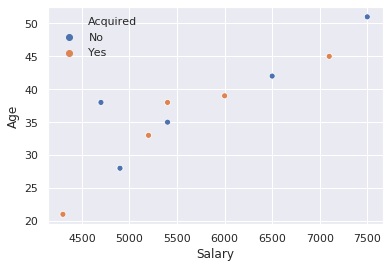

In [0]:
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
ax = sns.scatterplot(x="Salary", y="Age", hue="Acquired", data=df)


## Efetividade na Classificação

Criando as funções que calculam as diferentes métricas de efetividade:

### Cálculo das Medidas de Efetividade

Definindo as funções de efetividade e importando bibliotecas:

In [0]:
# Função que calcula os reais positivos
def rp(tp, fn):
    return tp + fn

# Função que calcula os reais negativos     
def rn(fp, tn):
    return fp + tn

# Função que calcula as predições positivas  
def pp(tp, fp):
    return tp + fp

# Função que calcula as predições negativas   
def pn(fn, tn):
    return fn + tn

# Função que calcula Acurácia do modelo
def accuracy (tp, fp, fn, tn):
     accuracy = ((tp + tn) / (tp + tn + fp + fn))
     return (accuracy)
    
# Função que calcula a Precisão 
def precision (tp, fp):
    precision =  (tp / (tp + fp)) #predições positivas
    return precision

# Função que calcula o Recall ou Taxa de True Positive (TTP)
def recall(tp, fn):
    recall =  (tp / (tp + fn)) # reais positivos
    return recall

## Função que calcula o f-measure (media harmonica entre Precision e Recall)
def f_measure(tp, fp, fn):
    f_measure = (2 * precision(tp, fp) * recall(tp, fn)) / (recall(tp, fn) + precision(tp, fp))
    return f_measure
  
# Função que calcula o Informedness 
def informedness(tp, fp, fn, tn):
    inform = ((tp/rp(tp, fn)) - (fp/rn(fp, tn)))
    return inform

# Função que calcula o Markedness
def markdness(tp, fp, fn, tn):    
    mark = ((tp/pp(tp,fp)) - (fn/pn(fn,tn)))
    return mark

# Função que calcula a taxa de False Positive (TFP)
def tfp(fp, tn):
  tfp = (fp / (tn + fp))
  return tfp

Função que plota o gráfico de curva ROC. Fonte: [Scikit-plot](https://scikit-plot.readthedocs.io/en/stable/metrics.html#scikitplot.metrics.plot_roc)

In [0]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import roc_curve, roc_auc_score, auc
from sklearn.preprocessing import label_binarize
from scipy import interp

def plot_roc(y_true, y_probas, title='ROC Curves',
                   plot_micro=True, plot_macro=True, classes_to_plot=None,
                   ax=None, figsize=None, cmap='nipy_spectral',
                   title_fontsize="large", text_fontsize="medium"):
    """Generates the ROC curves from labels and predicted scores/probabilities

    Args:
        y_true (array-like, shape (n_samples)):
            Ground truth (correct) target values.

        y_probas (array-like, shape (n_samples, n_classes)):
            Prediction probabilities for each class returned by a classifier.

        title (string, optional): Title of the generated plot. Defaults to
            "ROC Curves".

        plot_micro (boolean, optional): Plot the micro average ROC curve.
            Defaults to ``True``.

        plot_macro (boolean, optional): Plot the macro average ROC curve.
            Defaults to ``True``.

        classes_to_plot (list-like, optional): Classes for which the ROC
            curve should be plotted. e.g. [0, 'cold']. If given class does not exist,
            it will be ignored. If ``None``, all classes will be plotted. Defaults to
            ``None``

        ax (:class:`matplotlib.axes.Axes`, optional): The axes upon which to
            plot the curve. If None, the plot is drawn on a new set of axes.

        figsize (2-tuple, optional): Tuple denoting figure size of the plot
            e.g. (6, 6). Defaults to ``None``.

        cmap (string or :class:`matplotlib.colors.Colormap` instance, optional):
            Colormap used for plotting the projection. View Matplotlib Colormap
            documentation for available options.
            https://matplotlib.org/users/colormaps.html

        title_fontsize (string or int, optional): Matplotlib-style fontsizes.
            Use e.g. "small", "medium", "large" or integer-values. Defaults to
            "large".

        text_fontsize (string or int, optional): Matplotlib-style fontsizes.
            Use e.g. "small", "medium", "large" or integer-values. Defaults to
            "medium".

    Returns:
        ax (:class:`matplotlib.axes.Axes`): The axes on which the plot was
            drawn.

    Example:
        >>> import scikitplot as skplt
        >>> nb = GaussianNB()
        >>> nb = nb.fit(X_train, y_train)
        >>> y_probas = nb.predict_proba(X_test)
        >>> skplt.metrics.plot_roc(y_test, y_probas)
        <matplotlib.axes._subplots.AxesSubplot object at 0x7fe967d64490>
        >>> plt.show()

        .. image:: _static/examples/plot_roc_curve.png
           :align: center
           :alt: ROC Curves
    """
    y_true = np.array(y_true)
    y_probas = np.array(y_probas)

    classes = np.unique(y_true)
    probas = y_probas

    if classes_to_plot is None:
        classes_to_plot = classes

    if ax is None:
        fig, ax = plt.subplots(1, 1, figsize=figsize)

    ax.set_title(title, fontsize=title_fontsize)

    fpr_dict = dict()
    tpr_dict = dict()

    indices_to_plot = np.in1d(classes, classes_to_plot)
    for i, to_plot in enumerate(indices_to_plot):
        fpr_dict[i], tpr_dict[i], _ = roc_curve(y_true, probas[:, i],
                                                pos_label=classes[i])
        if to_plot:
            roc_auc = auc(fpr_dict[i], tpr_dict[i])
            color = plt.cm.get_cmap(cmap)(float(i) / len(classes))
            ax.plot(fpr_dict[i], tpr_dict[i], lw=2, color=color,
                    label='ROC curve of class {0} (area = {1:0.2f})'
                          ''.format(classes[i], roc_auc))

    if plot_micro:
        binarized_y_true = label_binarize(y_true, classes=classes)
        if len(classes) == 2:
            binarized_y_true = np.hstack(
                (1 - binarized_y_true, binarized_y_true))
        fpr, tpr, _ = roc_curve(binarized_y_true.ravel(), probas.ravel())
        roc_auc = auc(fpr, tpr)
        ax.plot(fpr, tpr,
                label='micro-average ROC curve '
                      '(area = {0:0.2f})'.format(roc_auc),
                color='deeppink', linestyle=':', linewidth=4)

    if plot_macro:
        # Compute macro-average ROC curve and ROC area
        # First aggregate all false positive rates
        all_fpr = np.unique(np.concatenate([fpr_dict[x] for x in range(len(classes))]))

        # Then interpolate all ROC curves at this points
        mean_tpr = np.zeros_like(all_fpr)
        for i in range(len(classes)):
            mean_tpr += interp(all_fpr, fpr_dict[i], tpr_dict[i])

        # Finally average it and compute AUC
        mean_tpr /= len(classes)
        roc_auc = auc(all_fpr, mean_tpr)

        ax.plot(all_fpr, mean_tpr,
                label='macro-average ROC curve '
                      '(area = {0:0.2f})'.format(roc_auc),
                color='navy', linestyle=':', linewidth=4)

    ax.plot([0, 1], [0, 1], 'k--', lw=2)
    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate', fontsize=text_fontsize)
    ax.set_ylabel('True Positive Rate', fontsize=text_fontsize)
    ax.tick_params(labelsize=text_fontsize)
    ax.legend(loc='lower right', fontsize=text_fontsize)
    return ax

Definido os valores da Matriz de Confusão

In [0]:
tp, fp, fn, tn = [1,1,1,2]

Calculando a Acurácia:

In [0]:
accuracy (tp, fp, fn, tn)

0.6

Calculando a Precision:

In [0]:
precision (tp, fp)

0.5

Calculando o Recall:

In [0]:
 recall(tp, fn)

0.5

Calculando o Informedness: 

In [0]:
informedness(tp, fp, fn, tn)

0.16666666666666669

Calculando o Markedness:

In [0]:
markdness(tp, fp, fn, tn)

0.16666666666666669

Definindo os valores para calculo do ROC-AUC

In [0]:
# Valores reais (ground truth)
y_true = np.array([1, 1, 2, 2])

#Probabilidade de estimar as classes positivas:
y_scores = np.array([0.1, 0.4, 0.35, 0.8])

# A probabilidade de predição de cada classe retornada por um classificador:
y_probas = np.array([[1, 0],
                     [1, 0],
                     [1, 0],
                     [0, 1]])

Calculando os valores da curva AUC (Area Under Curve):

In [0]:
roc_auc_score(y_true, y_scores)

0.75

Calculando as taxas de *false positive (tfp) e true positive (ttp)* os pontos da curva ROC (Receiver Operating Characteristic):

In [0]:
tfp, ttp, thresholds = roc_curve(y_true, y_scores, pos_label=2)

Exibindo as taxas tfp e ttp:

In [0]:
tfp

array([0. , 0. , 0.5, 0.5, 1. ])

In [0]:
ttp

array([0. , 0.5, 0.5, 1. , 1. ])

Plotando os pontos da curva ROC:

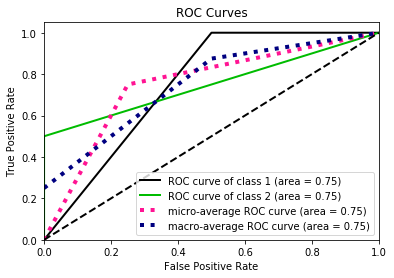

In [0]:
plot_roc(y_true, y_probas)

## Treinamento e Testes de Modelos de Predição

### Divisão do Dataset

Dividindo o dataset no conjunto de treinamento e testes. Normalmente o conjunto de testes equivale a 1/3 do dataset total:

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/3, random_state = 42)

print("Tamanho do Dataset. {}".format(df.shape[0]))
print("Tamanho do Conjunto de Treinamento. {}".format(len(X_train)))
print("Tamanho do Conjunto de Testes. {}".format(len(X_test)))


Tamanho do Dataset. 10
Tamanho do Conjunto de Treinamento. 6
Tamanho do Conjunto de Testes. 4


### Validação Cruzada


Criando uma função para definir os índices de uma validação cruzada:

In [0]:
# Função que retorna os indices do validação cruzada em k folds
def k_fold_cv(indexes, k = 5, seed = 42):
    
    size = len(indexes)
    subset_size = round(size / k)
    random.Random(seed).shuffle(indexes)
    subsets = [indexes[x:x+subset_size] for x in range(0, len(indexes), subset_size)]
    kfolds = []
    for i in range(k):
        test = subsets[i]
        train = []
        for subset in subsets:
            if subset != test:
                train.append(subset)
        kfolds.append((train,test))
        
    return ("Indices de Treinamento:", train, "Indices de Testes:", test)


    return mark

Utilizando a função criada para definir os índices de treinamento e testes a serem utilizados usando 5 folds:

In [0]:
k_fold_cv(list(df.index.values))

('Indices de Treinamento:',
 [[7, 3], [2, 8], [5, 6], [9, 4]],
 'Indices de Testes:',
 [0, 1])

Criação dos índices de validação cruzada com 5 folds usando a biblioteca sklearn: